## Source count : photometry with DAOStarFinder

In [1]:
# Demo from 
# http://photutils.readthedocs.io/en/stable/photutils/detection.html
import matplotlib.pyplot as plt
from astropy.stats import sigma_clipped_stats
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils import datasets, DAOStarFinder, CircularAperture


### Demo data : 

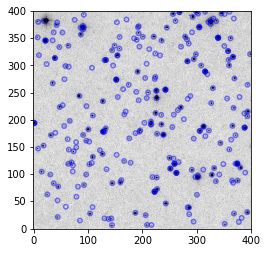

In [2]:
%matplotlib inline
# load the example star field and select its subregion
hdu = datasets.load_star_image()  
data = hdu.data[0:400, 0:400]    
# calculate mean, median , standard deviation of all pixel values in the image 
mean, median, std = sigma_clipped_stats(data, sigma=3.0, iters=5)    
# initialize DAOStarFinder Class instance 
daofind = DAOStarFinder(fwhm=3.0, threshold=5.*std)    
# find sources using DAOStarFinder,  passing it the 
# image data subtracted by the background 
sources = daofind(data - median)    

# sources have x,y positions, and CircularAperture tools helps to 
# make regions at these positions 
positions = (sources['xcentroid'], sources['ycentroid'])
apertures = CircularAperture(positions, r=4.)
# we normalize the image to make it more presentable ... 
norm = ImageNormalize(stretch=SqrtStretch())
plt.imshow(data, cmap='Greys', origin='lower', norm=norm)
# we overplot the detection apertures ... 
apertures.plot(color='blue', lw=1.5, alpha=0.5)

### NOAO  DECam  data ... Top 1% region

In [146]:
# Read in my compressed FITS file...
#http://docs.astropy.org/en/stable/io/fits/index.html
#http://www.astropy.org/astropy-tutorials/FITS-images.html
#http://www.astropy.org/astropy-tutorials/FITS-tables.html
DirIn = '/Users/chris/Downloads/'
fname = 'c4d_170428_094150_ooi_g_v1.fits.fz'
from astropy.io import fits
hdu = fits.open(DirIn+fname)

hdu stores  a mosaic of CCD images. hdu[0] contains  generic information about all images in the mosaic, whereas each following hdu  (hdu[1], hdu[2], etc) contains an image. 

In [147]:
#Display the main header : 
hdu[0].header    

SIMPLE  =                    T / Fits standard                                  
BITPIX  =                   16 / Bits per pixel                                 
NAXIS   =                    0 / Number of axes                                 
EXTEND  =                    T / File may contain extensions                    
DATE    = '2017-05-03T17:00:51' / Date FITS file was generated                  
IRAF-TLM= '2017-05-03T20:11:49' / Time of last modification                     
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
OBJECT  = 'DECaPS_27980_g'     / Name of the object observed                    
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
COMMENT MODIFIED:DATE,DATE-OBS,DTACQNAM,DTCALDAT,DTCOPYRI,DTINSTRU,DTNSANAM,DTOB
COMMENT SERV,DTPI,DTPIAFFL,DTPROPID,DTSITE,DTTELESC,DTTITLE,INSTRUME,OBSERVAT,OB
COMMENT SID,OBSTYPE,PROCTYPE

So from here I know that the scale 0.27 arcsec / px in both directions. Now, there are many image elements, they are called CompImageHDU.


In [148]:
hdu.info()

Filename: /Users/chris/Downloads/c4d_170428_094150_ooi_g_v1.fits.fz
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     251   ()      
  1  S29         CompImageHDU    125   (2046, 4094)   float32   
  2  S30         CompImageHDU    125   (2046, 4094)   float32   
  3  S31         CompImageHDU    125   (2046, 4094)   float32   
  4  S25         CompImageHDU    125   (2046, 4094)   float32   
  5  S26         CompImageHDU    125   (2046, 4094)   float32   
  6  S27         CompImageHDU    125   (2046, 4094)   float32   
  7  S28         CompImageHDU    125   (2046, 4094)   float32   
  8  S20         CompImageHDU    125   (2046, 4094)   float32   
  9  S21         CompImageHDU    125   (2046, 4094)   float32   
 10  S22         CompImageHDU    125   (2046, 4094)   float32   
 11  S23         CompImageHDU    125   (2046, 4094)   float32   
 12  S24         CompImageHDU    125   (2046, 4094)   float32   
 13  S14         CompImageHDU    125   (2046, 4

In [80]:
# Display the image header 
hdu[1].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 2046 / Axis length                                    
NAXIS2  =                 4094 / Axis length                                    
PCOUNT  =                    0 / No 'random' parameters                         
GCOUNT  =                    1 / Only one group                                 
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
EXTNAME = 'S29     '           / Extension name                                 
EXTVER  =                    1 / Extension version                              
INHERIT =                    T / Inherits global header                         
DATE    = '2014-09-08T10:25:41' / Date FITS file was generated                  
IRAF-TLM= '2014-09-08T10:26:

From that, I found that there are  2046x4094 pixels in each mosaic element.

In [149]:
x_px_scale = hdu[0].header['PIXSCAL1']  # arcsec / pixel
y_px_scale = hdu[0].header['PIXSCAL2']
x_n_pixels = hdu[1].header['NAXIS1']
y_n_pixels = hdu[1].header['NAXIS2']
x_arcsec = x_n_pixels * x_px_scale
y_arcsec = y_n_pixels * y_px_scale
print('Image size in arcmin is %f by %f'%(x_arcsec / 60, y_arcsec / 60 ))
area_size_sq_arcsec = x_arcsec * y_arcsec
area_size_sq_deg = area_size_sq_arcsec / (3600 * 3600)
print('Single image frame area is %d arcsec, i.e. %f sq.deg.' %(area_size_sq_arcsec, 
                                                    area_size_sq_deg ))



Image sice in arcmin is 9.207000 by 18.423000
Single image frame area is 610634 arcsec, i.e. 0.047117 sq.deg.


In [83]:
# NOAO Image data structure 
# http://iraf.noao.edu/projects/ccdmosaic/imagedef/imagedef.html#4.1
# https://fits.gsfc.nasa.gov/fits_primer.html 
# http://www.cv.nrao.edu/~aleroy/pytut/topic2/intro_fits_files.py
# http://datalab.noao.edu/notebooks/web/Data_Lab_Interface_Introduction.html 
# Display the informaiton ... 
#hdu.info()

Display the first mosaic element, the same that by default is shown in ds9 

Plotting the histogram of all pixel values helps decide how to stretch the scale : 

(array([ 6934057.,  1024452.,   171894.,    70257.,    40610.,    27076.,
           19831.,    15159.,    11732.,     9008.]),
 array([  599.07165527,   939.162854  ,  1279.25405273,  1619.34525146,
         1959.4364502 ,  2299.52764893,  2639.61884766,  2979.71004639,
         3319.80124512,  3659.89244385,  3999.98364258]),
 <a list of 10 Patch objects>)

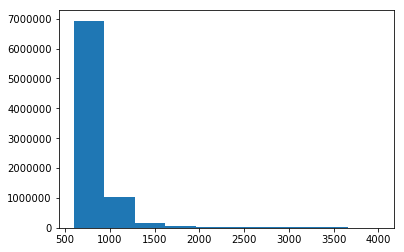

In [89]:
px_value = image_data.flatten()
plt.hist(px_value[px_value<4000])

/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/astropy/visualization/stretch.py:115: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(values, out=values)
/Users/chris/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


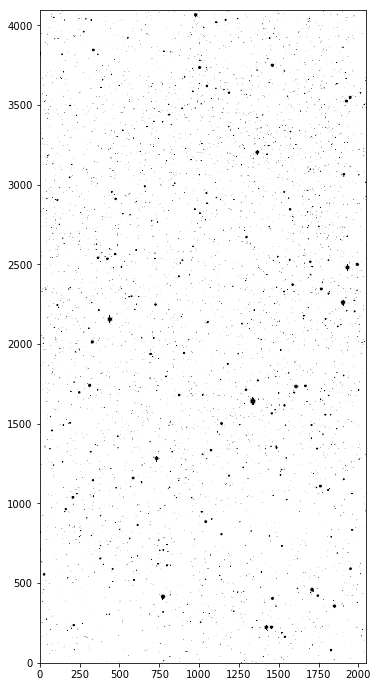

In [150]:
# Show the first mosaic element : 
h =1
image_data = hdu[h].data
fig,ax = plt.subplots(1,1,figsize = (6,12))
ax.imshow(image_data, cmap='Greys', origin='lower', norm=norm, vmin= 600, vmax = 4000)


Perform source detection on the first mosaic region. To do that we need to set the FWHM, and the threshold for detection : kwargs  (fwhm=3.0, threshold=5.*std)    

In [151]:
fwhm = hdu[1].header['FWHM'] # Median FWHM in pixels 
print('The median FWHM is %f pixels'%fwhm)

The median FWHM is 4.718707 pixels


Min: 213.407
Max: 2326.07
Mean: 294.087
Stdev: 95.5609
Sigma clipped mean: 269.027874
Sigma clipped median: 264.394867
Sigma clipped stdev: 22.471236
We set the threshold to 5 times the standard deviation of pixel value, i.e. 112.356179 
N sources here is 94


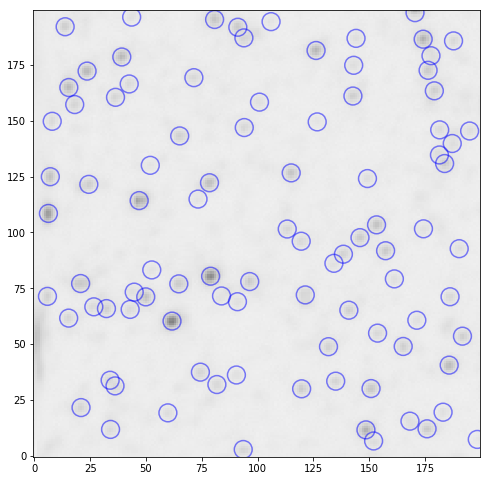

In [161]:
# http://www.astropy.org/astropy-tutorials/FITS-images.html 
# use the first layer, or whatever it is ..... 
# could it be like just one amplifier ? 
h =1
subregion = True 
if subregion : 
    image_data = hdu[h].data[:200,:200]
else:
    image_data = hdu[h].data
    
import numpy as np
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))


# I fear this works,  but it is just one frame...
mean, median, std = sigma_clipped_stats(image_data, sigma=3.0, iters=5) 

print('Sigma clipped mean: %f'%mean)
print('Sigma clipped median: %f'%median)
print('Sigma clipped stdev: %f'%std)

# set the detection threshold at 5 sigma 
threshold = 5 * std
print('We set the threshold to 5 times the standard deviation \
of pixel value, i.e. %f '%threshold)

# initialize DAOStarFinder Class instance 
daofind = DAOStarFinder(fwhm=fwhm, threshold=threshold)    

# run the source detection 
sources = daofind(image_data - median)    
print('N sources here is %d'%len(sources))

positions = (sources['xcentroid'], sources['ycentroid'])
apertures = CircularAperture(positions, r=4.)
norm = ImageNormalize(stretch=SqrtStretch())
    
fig,ax = plt.subplots(1,1,figsize = (8,16))
ax.imshow(image_data, cmap='Greys', origin='lower', norm=norm, vmax = 7000, 
          vmin = threshold)
apertures.plot(color='blue', lw=1.5, alpha=0.5)
if subregion : 
    plt.savefig(fname[:-5]+'_'+str(h)+'_sub_200x200_px.png', bbox_inches='tight')
else:
    plt.savefig(fname[:-5]+'_'+str(h)+'.png', bbox_inches='tight')

In [141]:
ImageNormalize?

Looks good! Convert the source density from the size of the image to the counts /  sq.deg. :  

In [162]:
if subregion  : 
    x_arcsec = 200 * x_px_scale
    y_arcsec = 200 * y_px_scale
    area_size_sq_arcsec = x_arcsec * y_arcsec
    area_size_sq_deg = area_size_sq_arcsec / (3600 * 3600)


source_density =  len(sources) / area_size_sq_deg # in sources / sq.deg
print('Source density is %f srcs / sq.deg.'%source_density)

Source density is 417777.777778 srcs / sq.deg.


Useful for later  : how to display  coordinates of the data ..
     http://docs.astropy.org/en/stable/visualization/wcsaxes/overlays.html 